# Attractor study

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 12)

np.set_printoptions(suppress=True, precision=3)

sns.set(font_scale=3.5)

from network import Protocol, NetworkManager, BCPNNPerfect, TimedInput
from plotting_functions import plot_weight_matrix, plot_state_variables_vs_time, plot_winning_pattern
from plotting_functions import plot_network_activity, plot_network_activity_angle
from analysis_functions import calculate_recall_time_quantities, calculate_angle_from_history
from connectivity_functions import artificial_connectivity_matrix

from connectivity_functions import create_orthogonal_canonical_representation, build_network_representation
from connectivity_functions import get_weights_from_probabilities, get_probabilities_from_network_representation

## The example

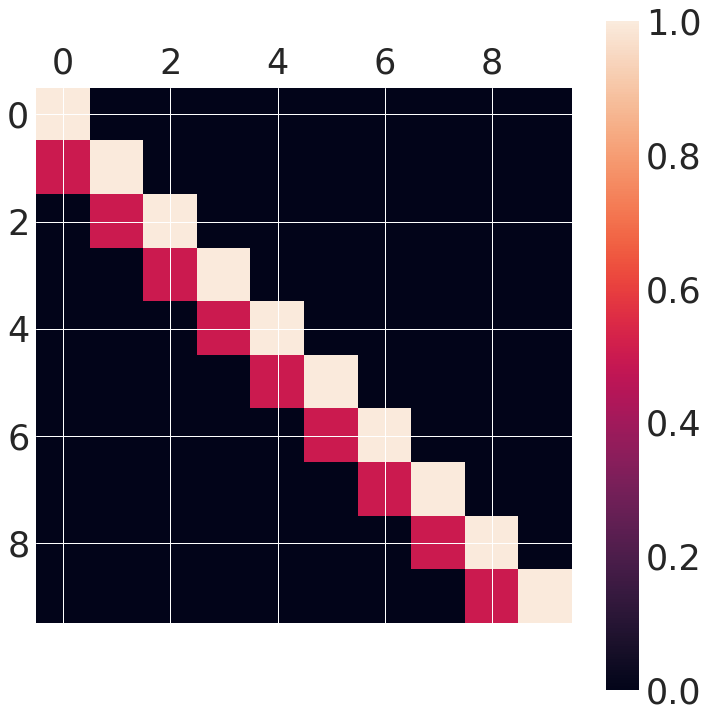

In [2]:
w_self = 1.0
w_next = 0.5
w_rest = 0.0
symmetric = False
minicolumns = 10

w = np.ones((minicolumns, minicolumns)) * w_rest
for i in range(minicolumns):
    w[i, i] = w_self
    
for i in range(minicolumns - 1):
    w[i + 1, i] = w_next
    if symmetric:
        w[i, i + 1] = w_next

plt.matshow(w)
plt.colorbar();

In [19]:
always_learning = False
strict_maximum = False
perfect = False
z_transfer = False
k_perfect = True
diagonal_zero = False
normalized_currents = True

# First we run the training protocol
g_w_ampa = 1.0
g_w = 0.0
g_a = 0.0
g_I = 0.0
g_beta = 0.0
tau_a = 0.100
G = 50.0
sigma = 0.0
tau_m = 0.020
tau_z_pre_ampa = 0.025
tau_z_post_ampa = 0.025
tau_z_post_ampa = tau_z_pre_ampa
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's', 'a', 'i_ampa']


# Build the network
nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, g_beta=g_beta, tau_a=tau_a, 
                  tau_m=tau_m, sigma=sigma, G=G, tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, 
                  tau_p=tau_p, z_transfer=z_transfer, diagonal_zero=diagonal_zero, g_I=g_I,
                  strict_maximum=strict_maximum,  perfect=perfect, k_perfect=k_perfect, 
                  always_learning=always_learning,  normalized_currents=normalized_currents)

manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)
nn.w_ampa = w

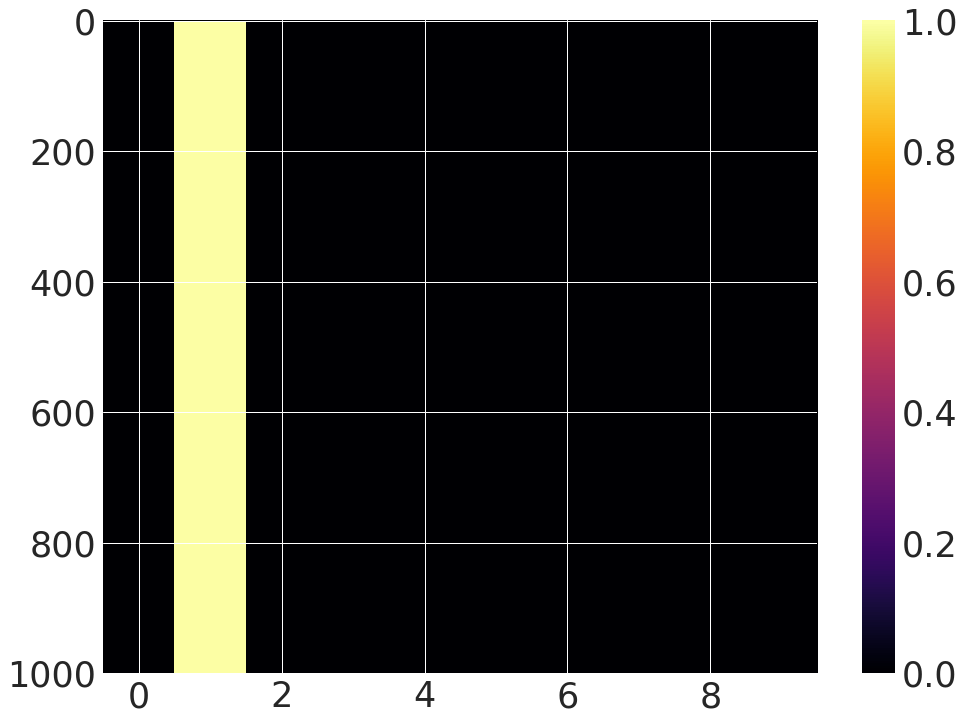

In [34]:
T_cue = 1.0
T_recall = 1.0 + T_cue
time = np.arange(0, T_cue, manager.dt)

patterns_indexes = [i for i in range(n_patterns)]
sequences = [patterns_indexes]
I_cue = 0
# manager.run_network_recall(T_recall=T_recall, T_cue=T_cue, reset=True, empty_history=True)
manager.nn.reset_values()
manager.empty_history()
nn.s = np.array([0, w_self, w_next, 0, 0, 0, 0, 0, 0, 0])

manager.run_network(time=time, I=None)
plt.imshow(manager.history['o'], cmap='inferno', vmin=0.0, vmax=1.0, aspect='auto')
plt.colorbar();

#plot_network_activity_angle(manager)

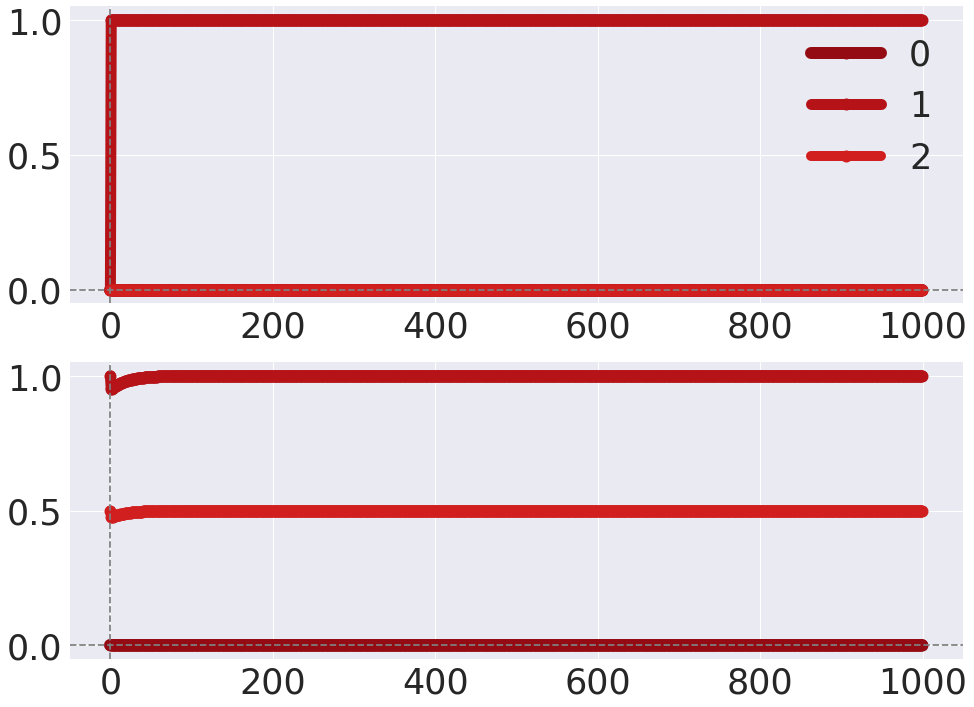

In [35]:
palette = sns.color_palette("Reds_r", minicolumns)
o = manager.history['o']
s = manager.history['s']
i_ampa = manager.history['i_ampa']

markersize= 12
linewidth = 12
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


indexes = [i for i in range(minicolumns)]
# indexes = [0, 1, 4, 8, 9]
indexes = [0, 1, 2]
for i in indexes:
    lw = linewidth - 1.0 * i 
    ax1.plot(o[:, i], 'o-', color=palette[i], markersize=markersize, lw=lw, label=str(i))
    ax2.plot(s[:, i], 'o-', color=palette[i], markersize=markersize, lw=lw)
    
ax1.legend()
ax1.axhline(0, ls='--', color='gray')
ax1.axvline(0, ls='--', color='gray')
ax2.axhline(0, ls='--', color='gray')
ax2.axvline(0, ls='--', color='gray');

In [36]:
i_ampa.shape

(1000, 10)

In [33]:
nn.s

array([ 1. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])